In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
bachelorette = pd.read_csv('bachelorette-contestants.csv')
bachelorette.head()

,Name,Age,Occupation,Hometown,ElimWeek,Season
0,Ryan Sutter,29,Firefighter,"Vail, Colorado",NaN,1
1,Charlie Maher,28,Financial Analyst,"Hermosa Beach, California",6.0,1
2,Russ,30,Writer,"San Rafael, California",5.0,1
3,Greg T.,28,Importer,"Manhattan, New York",4.0,1
4,Bob Guiney,31,Mortgage Broker,"Ferndale, Michigan",3.0,1


In [3]:
bachelor = pd.read_csv('bachelor-contestants.csv')
bachelor.head()

,Name,Age,Occupation,Hometown,Height,ElimWeek,Season
0,Amanda Marsh,23.0,Event Planner,"Chanute, Kansas",NaN,NaN,1
1,Trista Rehn,29.0,Miami Heat Dancer,"Miami, Florida",NaN,6.0,1
2,Shannon Oliver,24.0,Financial Management Consultant,"Dallas, Texas",NaN,5.0,1
3,Kim,24.0,Nanny,"Tempe, Arizona",NaN,4.0,1
4,Cathy Grimes,22.0,Graduate Student,"Terra Haute, Indiana",NaN,3.0,1


In [4]:
bachelorette.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        282 non-null    object 
 1   Age         282 non-null    int64  
 2   Occupation  282 non-null    object 
 3   Hometown    282 non-null    object 
 4   ElimWeek    271 non-null    float64
 5   Season      282 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 13.3+ KB


In [5]:
def get_state(x):
    ''' 
    Extracts the state from the hometown column. 
    Isnt fully effective since there are other countries and abbreviations.
    '''
    if type(x)==str:
        try:
            return x.split(',')[1].strip()
        except IndexError:
            print(x)

bachelor['state'] = bachelor.Hometown.map(get_state)
print('bachelor complete...')
bachelorette['state'] = bachelorette.Hometown.map(get_state)
print('bachelorette complete...')

Italy
bachelor complete...
bachelorette complete...


In [6]:
def state_sums(df, plot=False):
    '''Returns sorted series tallying number of contestants from a state'''
    # create dummies to sum
    state_counts = pd.get_dummies(df.state)
    state_sums = state_counts.sum(axis=0).sort_values()
    if plot:
        plt.figure(figsize=(15,10))
        sns.barplot(x=state_sums.index, y=state_sums)
        plt.xticks(rotation='vertical')
    return state_sums

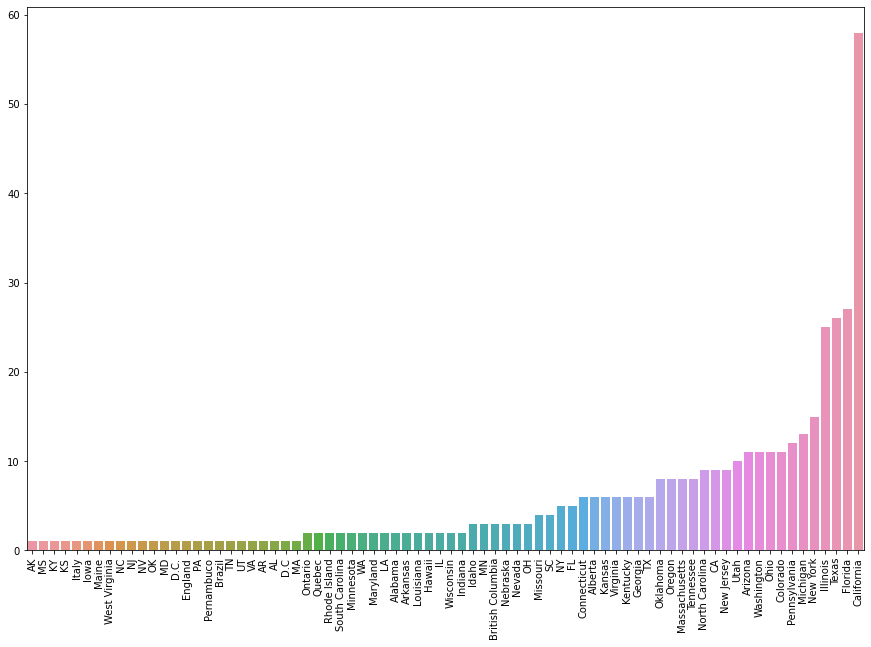

In [7]:
bachelor_state_sums = state_sums(bachelor, plot=True)